# Web Crawling Implementation

This part of the code cotains the main web crawler implementation.

In [1]:
%pip install requests beautifulsoup4 pandas openpyxl matplotlib

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Imports
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Defining base URL
url = 'https://www.cnn.com'

# Using set to avoid duplicates
all_urls = set()

# Fetching main CNN page
data = requests.get(url).text

# Parsing HTML content
soup = BeautifulSoup(data, features="html.parser")

# Extract article URLs
for a in soup.find_all('a', href=True):
    href = a['href']
    # Avoiding irrelevant URLs
    if href and href.startswith('/') and not href.startswith(('//', '#', '/video', '/audio', '/gallery')) and '/gallery/' and '/video/' not in href:
        full_url = url + href
        all_urls.add(full_url)        
        # Stopping after 50 URLs
        if len(all_urls) >= 50:
            break

# Function to filter out ads
def is_article(url):
    # Exclude URLs with 'cnn-underscored' (ads)
    if 'cnn-underscored' in url:
        return False
    return True

# Function to handle None return values
def is_date(element):
    if element:
        return element.get_text()
    else:
        return None

# Function to extract and clean publication date
def extract_date(soup):
    pub_date = is_date(soup.find('div', {'class': 'timestamp'}))
    if pub_date:
        temp = pub_date.split()
        # Keeping only the last 3 tokens
        return " ".join(temp[-3:])
    return None

# Function to extract article summary
def extract_summary(soup):
    summary = soup.find('meta', {'name': 'description'})
    return summary.get('content') if summary else None

# Function to extract Titles, Dates, and Summaries
def extract_article_details(article_url):

    # Requesting and Parsing Data
    data2 = requests.get(article_url).text
    soup2 = BeautifulSoup(data2, features="html.parser")
    
    # Extracting Title
    title = soup2.find('h1') or soup2.find('title')
    title = title.get_text(strip=True) if title else None
    
    # Extracting Date
    pub_date = extract_date(soup2)
    if not pub_date:
        return None
    
    # Extracting Summary
    summary = extract_summary(soup2)
    if not summary:
        return None

    # Returning article details
    return {
        'Title': title,
        'Date': pub_date,
        'URL': article_url,
        'Summary': summary
    }

# List to store article data
article_data = []

# Collecting data from all URLs
for article_url in all_urls:
    if is_article(article_url):
        article_details = extract_article_details(article_url)
        # Skipping articles with missing info
        if article_details:
            article_data.append(article_details)
    # Displaying invalid URls (ads)
    else:
        print(f"Skipped URL: {article_url}\n")

Skipped URL: https://www.cnn.com/cnn-underscored/reviews/best-sandals-for-men

Skipped URL: https://www.cnn.com/cnn-underscored/reviews/best-beach-wagon

Skipped URL: https://www.cnn.com/cnn-underscored/reviews/best-electric-toothbrush

Skipped URL: https://www.cnn.com/cnn-underscored/reviews/best-water-filter-pitchers

Skipped URL: https://www.cnn.com/cnn-underscored/reviews/best-cooling-fans

Skipped URL: https://www.cnn.com/cnn-underscored/reviews/best-camping-chairs

Skipped URL: https://www.cnn.com/cnn-underscored/home/best-amazon-products-big-difference

Skipped URL: https://www.cnn.com/cnn-underscored/home/professional-lawn-garden-products

Skipped URL: https://www.cnn.com/cnn-underscored/reviews/best-hydrating-serums

Skipped URL: https://www.cnn.com/cnn-underscored/deals/apple-airpods-sale-2025-05-08

Skipped URL: https://www.cnn.com/cnn-underscored/reviews/best-hair-dryer

Skipped URL: https://www.cnn.com/cnn-underscored/home/products-under-50-to-upgrade-your-home

Skipped UR

# Topic Categorization

Implementing topic categorization using pre-trained spacy model.

In [3]:
%pip install spacy
!python -m spacy download en_core_web_md

  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.12-cp312-cp312-win_amd64.whl.metadata (2.2 kB)
  Using cached cymem-2.0.11-cp312-cp312-win_amd64.whl.metadata (8.8 kB)
  Using cached preshed-3.0.9-cp312-cp312-win_amd64.whl.metadata (2.2 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.5.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached marisa_trie-1.2.1-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
   ---------------------------


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------- ----------------------------- 8.4/33.5 MB 58.0 MB/s eta 0:00:01
     ------------------------ -------------- 21.0/33.5 MB 57.7 MB/s eta 0:00:01
     --------------------------------------  33.3/33.5 MB 60.4 MB/s eta 0:00:01
     --------------------------------------- 33.5/33.5 MB 54.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Imports
import spacy

# Creating dataframe from extracted data
df = pd.DataFrame(article_data)

# Loading spacy model
nlp = spacy.load("en_core_web_md")

# Defining categories with sample keywords for similarity comparison
category_keywords = {
    
    "Politics": ["election", "government", "president", "senate", "congress", "law", "political", "policy", "foreign", "prime minister"],
    "Science": ["research", "study", "scientist", "climate", "space", "biology", "physics", "chemistry"],
    "Technology": ["artificial intelligence", "software", "technology", "internet", "hardware", "cybersecurity"],
    "Health": ["covid", "vaccine", "health", "medical", "disease", "pandemic", "therapy", "medicine", "drug"],
    "Sports": ["cricket", "football", "soccer", "tennis", "olympics", "basketball", "athlete"],
    "Business": ["stocks", "economy", "market", "trade", "investment", "company", "finance"]
}

# Function to categorize articles using NLP
def categorize_using_nlp(title, summary):
    
    # Combining title and summary
    text = title + " " + summary  

    # Processing with spacy
    doc = nlp(text.lower())  

    # Default Category
    best_category = "Other"
    
    best_score = 0
    for category, keywords in category_keywords.items():

        # Converting category keywords to a single doc
        category_doc = nlp(" ".join(keywords)) 

        # Computing similarity score
        similarity = doc.similarity(category_doc)  

        # Comparing results
        if similarity > best_score:
            best_category = category
            best_score = similarity

    return best_category

# Function to categorize using URL structure
def categorize_using_url(url, current_category):
    # Only categorizes unclassified (Other)
    if current_category == "Other":
        for category in category_keywords.keys():
            if f"/{category.lower()}" in url.lower():
                return category
    return current_category

# Applying NLP-based categorization
df['Category'] = df.apply(lambda row: categorize_using_nlp(row['Title'], row['Summary']), axis=1)

# Applying URL-based categorization if necessary
df['Category'] = df.apply(lambda row: categorize_using_url(row['URL'], row['Category']), axis=1)

# Saving to the Excel File
# df.to_excel(file, index=False)
# print(f"\nCategorized data saved to {file}")

# Function to display categorized articles
def display_articles_by_category(category):
    results = df[df['Category'].str.lower() == category.lower()]    
    if results.empty:
        print(f"\nNo articles found for category: {category}")
    else:
        print(f"\nArticles in category '{category}':\n")
        for _, row in results.iterrows():
            print(f"Title: {row['Title']}")
            print(f"Publication Date: {row['Date']}")
            print(f"Summary: {row['Summary']}")
            print(f"URL: {row['URL']}\n")

After running the cell below enter a category to get revelant articles.

In [5]:
# Asking user for input
user_category = input("\nEnter a category to view articles (Politics, Science, Technology, Health, Sports, Business, Other): ")
display_articles_by_category(user_category)


Articles in category 'politics':

Title: Shedeur Sanders aiming to ‘prove himself right’ instead of other ‘people wrong’ as he begins NFL career
Publication Date: May 11, 2025
Summary: Cleveland Browns quarterback Shedeur Sanders said his “job here isn’t to prove people wrong” but to “prove myself right” as he spoke to the media for the first time since his dramatic slide and fifth round selection during the NFL Draft.
URL: https://www.cnn.com/2025/05/11/sport/shedeur-sanders-rookies-nfl-practice-spt

Title: Cassie Ventura’s civil suit against Sean ‘Diddy’ Combs preceded his criminal case. Here’s how her life has changed since
Publication Date: May 11, 2025
Summary: Cassie Ventura would not have been blamed had she decided to disappear from public life and social media.
URL: https://www.cnn.com/2025/05/11/entertainment/cassie-ventura-sean-diddy-combs

Title: Tariffs could take the bloom off Mother’s Day flowers
Publication Date: May 10, 2025
Summary: Mother’s Day is a busy season for 

# Data Visualization

Below we have two graphs:
- Bar chart showing the distribution of topics.
- Line graph tracking the number of articles published overtime.

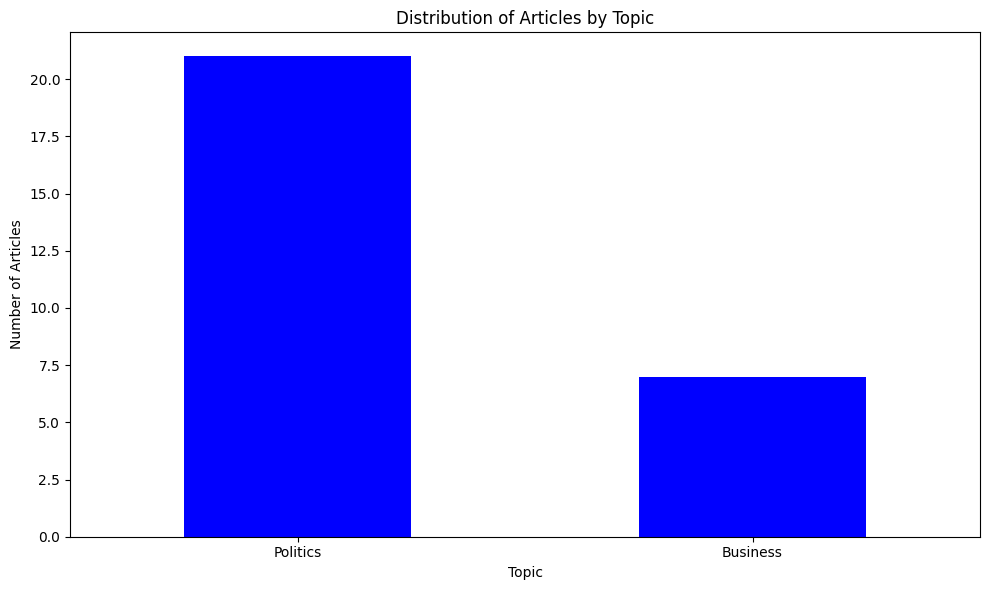

In [6]:
# Imports
import matplotlib.pyplot as plt

# Displaying bar chart 
topic_count = df['Category'].value_counts()
plt.figure(figsize=(10, 6))
topic_count.plot(kind='bar', color='blue')
plt.title('Distribution of Articles by Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

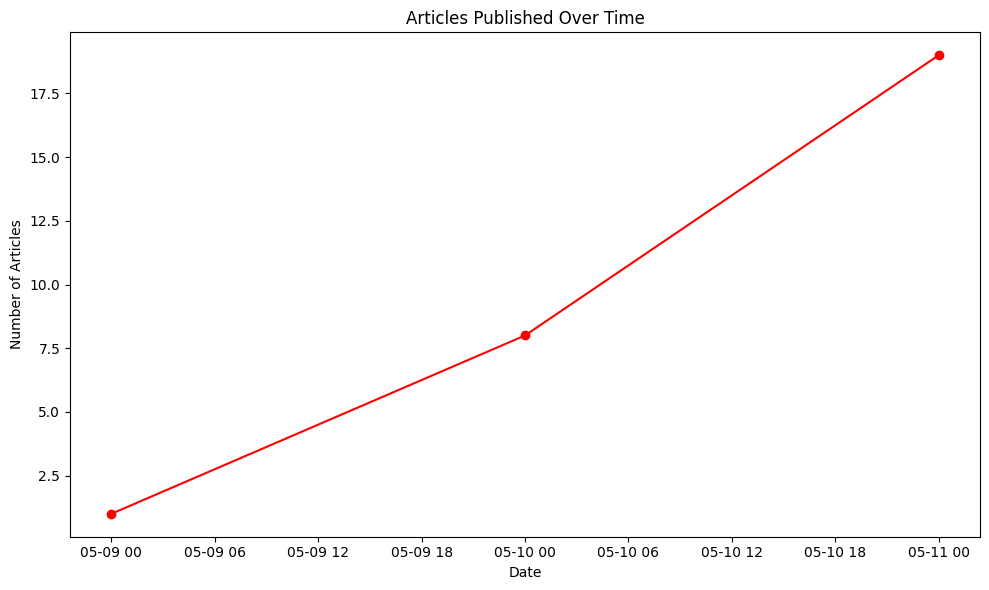

In [7]:
# Displaying line graph
df['Publication Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.date
articles_by_date = df.groupby(df['Publication Date']).size()
plt.figure(figsize=(10, 6))
articles_by_date.plot(kind='line', marker='o', color='red')
plt.title('Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

# Dropping 'Publication Date' column after plotting
df.drop('Publication Date', axis=1, inplace=True)

# Generating Summaries

Next, we generated our own summaries using spacy by going through all the text in an article and picking the best 3 lines which gave us the most relevant information about the article.

In [8]:
%pip install newspaper3k lxml_html_clean pydantic
!pip install --upgrade pydantic

  Using cached newspaper3k-0.2.8-py3-none-any.whl.metadata (11 kB)
  Using cached feedparser-6.0.11-py3-none-any.whl.metadata (2.4 kB)
  Using cached feedfinder2-0.0.4-py3-none-any.whl
  Using cached jieba3k-0.35.1-py3-none-any.whl
  Using cached tinysegmenter-0.3-py3-none-any.whl
  Using cached sgmllib3k-1.0.0-py3-none-any.whl
  Using cached requests_file-2.1.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached newspaper3k-0.2.8-py3-none-any.whl (211 kB)
Using cached feedparser-6.0.11-py3-none-any.whl (81 kB)
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 32.6 MB/s eta 0:00:00
Using cached requests_file-2.1.0-py2.py3-none-any.whl (4.2 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pydantic-2.11.4-py3-none-any.whl.metadata (66 kB)
  Using cached pydantic_core-2.33.2-cp312-cp312-win_amd64.whl.metadata (6.9 kB)
  Using cached typing_inspection-0.4.0-py3-none-any.whl.metadata (2.6 kB)
Using cached pydantic-2.11.4-py3-none-any.whl (443 kB)
Using cached pydantic_core-2.33.2-cp312-cp312-win_amd64.whl (2.0 MB)
Using cached typing_inspection-0.4.0-py3-none-any.whl (14 kB)
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.20.1
    Uninstalling pydantic_core-2.20.1:
      Successfully uninstalled pydantic_core-2.20.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.8.2
    Uninstalling pydantic-2.8.2:
      Successfully uninstalled pydantic-2.8.2


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-ibm-runtime 0.37.0 requires pydantic<2.10,>=2.5.0, but you have pydantic 2.11.4 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Imports
from newspaper import Article
import time

# Loading spacy model
nlp = spacy.load("en_core_web_md")

# Function to get article text
def fetch_article(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        return article.text
    except Exception as e:
        print(f"Error fetching {url}: {e}")
        return ""

# Function to get most informative sentences
def summarize_article(text, num_sentences=3):
    
    doc = nlp(text)
    sentences = list(doc.sents)

    # Scoring sentences based on named entities & nouns
    sentence_scores = {}
    for sent in sentences:
        score = sum(1 for token in sent if token.ent_type_ or token.pos_ in ["NOUN", "PROPN"])
        sentence_scores[sent] = score

    # Selecting top 3 sentences with the highest scores
    ranked_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)
    summary = " ".join(str(sentence) for sentence in ranked_sentences[:num_sentences])
    
    return summary.strip()

# Extracting and summarizing articles
summaries = []
for url in df['URL']:
    print(f"Processing: {url}")
    article_text = fetch_article(url)    
    if article_text:
        summary = summarize_article(article_text)
    else:
        summary = "Could not retrieve article."

    # Adding generated summary to the list
    summaries.append(summary)

# Add summaries to the dataframe
df["Generated Summary"] = summaries

# Removing '\n' from the generated summaries
df["Generated Summary"] = df["Generated Summary"].str.replace("\n", "", regex=True)

# Saving to the Excel File
file = 'articles.xlsx'
df.to_excel(file, index=False)
print(f"\nData saved to {file}")

Processing: https://www.cnn.com/2025/05/10/sport/trendlines-nba-playoff-ticket-prices-spt
Processing: https://www.cnn.com/2025/05/11/sport/shedeur-sanders-rookies-nfl-practice-spt
Processing: https://www.cnn.com/2025/05/11/politics/trump-luxury-jet-qatar-air-force-one
Processing: https://www.cnn.com/2025/05/11/politics/top-us-officials-emerge-from-china-trade-talks-touting-substantial-progress-and-agreement
Processing: https://www.cnn.com/2025/05/11/entertainment/cassie-ventura-sean-diddy-combs
Processing: https://www.cnn.com/2025/05/11/us/newark-airport-outage-dg
Processing: https://www.cnn.com/2025/05/10/business/mothers-day-flowers-tariffs
Processing: https://www.cnn.com/2025/05/10/europe/pope-leo-prevost-cardinals-artificial-intelligence-intl
Processing: https://www.cnn.com/2025/05/11/politics/victory-day-army-military-parade-trump
Processing: https://www.cnn.com/2025/05/11/travel/sopa-de-ajo-garlic-spain-cec
Processing: https://www.cnn.com/2025/05/11/politics/ice-facility-democrat